<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Linear Regression Review Lab

_Authors: Alexander Combs (NYC)_

---

In [4]:
import numpy as np
import pandas as pd
import random

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
#scipy stats models - does not get used in industry
# we are going to use sklearn (scikitlearn)

### Create a Python dictionary 

- Use the following as the keys: 'X' and 'Y'
- Create two lists to use as the values in the dictionary: <br>
    for 'X': 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 <br>
    for 'Y': .5, .7, .8, .99, 1, 1.4, 1.8, 2.1, 2.4, 2.9

In [13]:
# A:
df = dict()
df['X'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
df['y'] = [.5, .7, .8, .99, 1, 1.4, 1.8, 2.1, 2.4, 2.9]

df['X'].extend([(val+10) for val in df['X']])
df['y'].extend([(val+3) for val in df['y']])
df

{'X': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 'y': [0.5,
  0.7,
  0.8,
  0.99,
  1,
  1.4,
  1.8,
  2.1,
  2.4,
  2.9,
  3.5,
  3.7,
  3.8,
  3.99,
  4,
  4.4,
  4.8,
  5.1,
  5.4,
  5.9]}

In [2]:
df

{'X': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'y': [0.5, 0.7, 0.8, 0.99, 1, 1.4, 1.8, 2.1, 2.4, 2.9]}

### Using that dictionary, create a pandas DataFrame and call it pre_df

In [14]:
# A:
df = pd.DataFrame(df)
df.head()

,X,y
0,1,0.50
1,2,0.70
2,3,0.80
3,4,0.99
4,5,1.00


### Using the Series from the DataFrame, create two new series

- The first list should use the 'X' values and add 10 to each value
- The second list should use the 'Y' values and add 3 to each
- Add those new lists to a new DataFrame and save it as new_data (hint: zip())

Note: the original DataFrame should be unchanged (don't save to pre_df as new columns)

In [9]:
# A:
# df['X_new'] = df['X'] + 10
# df['y_new'] = df['y'] + 3
# df

,X,y,X_new,y_new
0,1,0.50,11,3.50
1,2,0.70,12,3.70
2,3,0.80,13,3.80
3,4,0.99,14,3.99
4,5,1.00,15,4.00
5,6,1.40,16,4.40
6,7,1.80,17,4.80
7,8,2.10,18,5.10
8,9,2.40,19,5.40
9,10,2.90,20,5.90


### Using pd.concat, vertically concat the new DataFrame, new_data, to the original pre_df DataFrame. Save it as df.

Hint: Be mindful of your column names, and make sure your index is 0-based and continuous.

In [ ]:
# A:

### Plot the df DataFrame using pandas + matplotlib

- Set the figure size to 12 wide and 6 height
- Add a title, 'X vs Y' to the plot
- Set the size of the markers to 50 and the color of the markers to black

Text(0, 0.5, 'y')

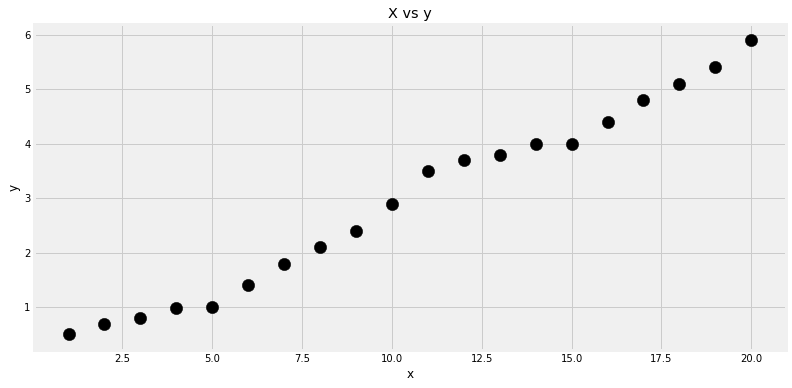

In [19]:
# A:
plt.figure(figsize=(12,6))
plt.scatter(df['X'], df['y'], s=150, color='black');
plt.title('X vs y')
plt.xlabel('x')
plt.ylabel('y')

### Using statsmodels, fit an OLS regression to your data and print our the summary

In [20]:
# A:
from sklearn.linear_model import LinearRegression

X = np.array(df['X']).reshape(-1, 1)
y = df['y']

#instantiate
lm = LinearRegression()

#fit
lm.fit(X,y)

#predict

#score

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# yhat = lm.intercept_ + lm_coef[0]*X
lm.coef_
lm.intercept_

#predict
yhat = lm.predict(X)
yhat2 = lm.intercept_ + lm.coef_[0]*X

In [27]:
#score - rsquared value
lm.score(X,y)

0.9860390205423032

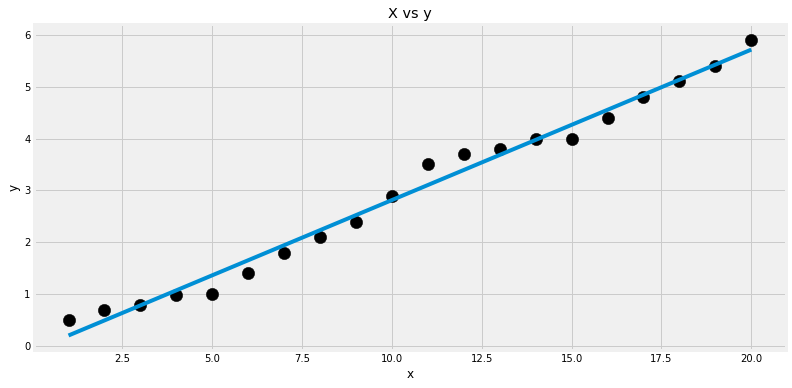

In [29]:
plt.figure(figsize=(12,6))
plt.scatter(df['X'], df['y'], s=150, color='black');
plt.title('X vs y')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(df['X'], yhat);

In [31]:
X_pred = np.array([[21],[50],[27]])
lm.predict(X_pred)

array([ 6.00368421, 14.41281203,  7.74350376])

## Using the model you fitted, answer the folowing questions:

### What is the R-squared for the model?

In [ ]:
# A:0.986


### What is the p-value for your X?

In [ ]:
# A:

### What is the intercept?

In [28]:
# A:
lm.coef_

array([0.28996992])

### Using the above, write the equation for our model

In [ ]:
# A:
yhat2 = lm.intercept_ + lm.coef_[0]*X

### Solve the equation for an x of 20 then 21 (by hand/calculator)

In [ ]:
# A:

In [ ]:
# A:

### Using the predict functionality of statsmodels, predict the values for 20 and 21

Hint: You'll need to use a list - don't forget your intercept!

In [ ]:
# A:

### Get the SSE by using the predictions for every X (y_hats) and the true y values

In [ ]:
# A:

### Now plot your predictions for every X

- Plot the predictions as a line and the true y values using a scatterplot

In [ ]:
# A:

### Import PolynomialFeatures from sklearn. Then do the following:

- Instantiate a PolynomialFeatures object and save it as poly
- Documentation is [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
- Use degree=5 (Hint: If that gives you more than 6 columns, you forgot to remove something)
- Use fit_transform on X to create a numpy array of polynomial features
- Save that array as poly_feats
- Convert this array to a DataFrame and save it as poly_X
- Join this new poly_df DataFrame with df['Y'] using pd.merge (Hint: join on the index)
- Save this joined index as pdf

In [ ]:
# A:

In [ ]:
# A:

In [ ]:
# A:

### Using statsmodels as before, fit this new model and save it as poly_results

In [ ]:
# A:

### Print out the model's predictions and save them as poly_yhat

In [ ]:
# A:

### Calculate the SSE

In [ ]:
# A:

### Now, create a for loop that does the follow:

- Iterates over the following alpha values [0, .001, .01, .25, .5, 1, 10]
- In each loop, you are going to fit a regularized regression
- See [Statsmodels Docs](http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.OLS.fit_regularized.html) to understand how to do this
- In each loop, set the value of alpha to the value of being iterated over
- Set the L1_wt parameter to 0
- In each loop print out the alpha value, the SSE, and the mean absolute value of the coefficient of the model
- You should also print out the predictions as a line and the true y's as a scatterplot as above

In [ ]:
# A:

### Using the output of the above, answer the following:
- What happens to the SSE over the increasing alpha values?
- What happens to the mean abs. value of the coefficients?
- Does increasing the bias to reduce variance always mean a better model?

In [ ]:
# A:

In [ ]:
# A:

In [ ]:
# A: